# Random data

(2, 100) (100,)


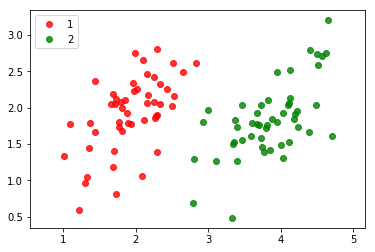

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
# X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
# X = np.random.normal(size=(200,2))
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 50

X1 = np.random.multivariate_normal(means[0], cov, N).T
X2 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X1, X2), axis=1)
y = np.concatenate((np.ones(N), 2*np.ones(N)))

print(X.shape, y.shape)

plt.plot(X1[0], X1[1], 'ro', alpha = 0.8, label=1)
plt.plot(X2[0], X2[1], 'go', alpha = 0.8, label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.axis('equal')
plt.show()

# LDA

## Implement

[[ 0.15545145]
 [-0.08840365]]
(1, 100) (2, 100)
[ 0.86926684 -0.49434315]
[0.04577252 0.99895189]
ss : -1.7584280004460335 -1.758428000446033


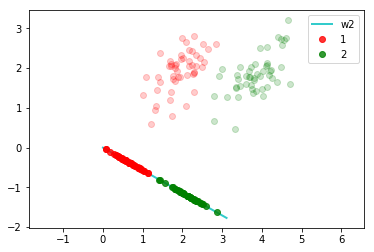

In [12]:
m1 = np.mean(X1, axis=1, keepdims=True)
m2 = np.mean(X2, axis=1, keepdims=True)
Sb = (m2-m1).dot((m2-m1).T)
Sw = (X1-m1).dot((X1-m1).T) + (X2-m2).dot((X2-m2).T)
# print(X1.shape, X2.shape, m1.shape, m2.shape, Sb.shape, Sw.shape)
w2 = np.linalg.inv(Sw).dot(m2-m1)
Z = w2.T.dot(X)
X_new = np.linalg.pinv(w2.T).dot(Z)
print(w2)
print(Z.shape, X_new.shape)

M = np.linalg.inv(Sw).dot(Sb)
val, vec = np.linalg.eig(M)
print(vec[:,0])
print(vec[:,1])

print("ss :", w2[0,0]/w2[1,0], vec[0,0]/vec[1,0])



plt.figure()
plt.plot([0, w2[0]*20], [0, w2[1]*20], 'c-', alpha = 0.8, lw=2, label='w2')

plt.plot(X1[0], X1[1], 'ro', alpha = 0.2)
plt.plot(X2[0], X2[1], 'go', alpha = 0.2)

plt.plot(X_new[0, y==1], X_new[1, y==1], 'ro', alpha=0.8, label=1)
plt.plot(X_new[0, y==2], X_new[1, y==2], 'go', alpha=0.8, label=2)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.axis('equal')
plt.show()

## Sklearn

[[15.23424217 -8.66355755]] [-27.70192351]


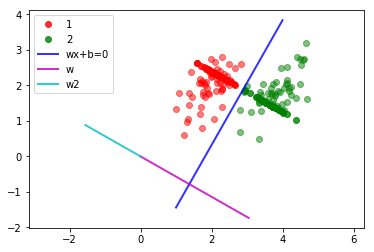

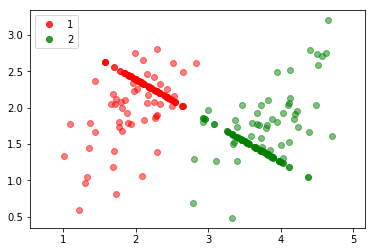

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

def inverse_transform(lda, x):
    if lda.solver == 'lsqr':
        raise NotImplementedError("(inverse) transform not implemented for 'lsqr' "
                                  "solver (use 'svd' or 'eigen').")
    inv = np.linalg.pinv(lda.scalings_)
    if lda.solver == 'svd':
        x_back = np.dot(x, inv) + lda.xbar_
    elif lda.solver == 'eigen':
        x_back = np.dot(x, inv)

    return x_back

lda = LinearDiscriminantAnalysis(n_components=1)
Z = lda.fit_transform(X.T, y)
Xr = inverse_transform(lda, Z)
w = lda.coef_
b = lda.intercept_
print(w, b)

plt.figure()
plt.plot(X1[0], X1[1], 'ro', alpha = 0.5)
plt.plot(X2[0], X2[1], 'go', alpha = 0.5)
plt.plot(Xr[y==1, 0], Xr[y==1, 1], 'ro', alpha=0.8, label=1)
plt.plot(Xr[y==2, 0], Xr[y==2, 1], 'go', alpha=0.8, label=2)

x1 = np.linspace(1,4,4)
x2 = -(w[0,0]*x1+b[0])/w[0,1]
# print(x1,x2)
plt.plot(x1, x2, 'b-', alpha = 0.8, lw=2, label='wx+b=0')
plt.plot([0, w[0,0]/5], [0, w[0,1]/5], 'm-', alpha = 0.8, lw=2, label='w')

plt.plot([0, w2[0]*-10], [0, w2[1]*-10], 'c-', alpha = 0.8, lw=2, label='w2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.axis('equal')

plt.figure()
plt.plot(X1[0], X1[1], 'ro', alpha = 0.5)
plt.plot(X2[0], X2[1], 'go', alpha = 0.5)
plt.plot(Xr[y==1, 0], Xr[y==1, 1], 'ro', alpha=0.8, label=1)
plt.plot(Xr[y==2, 0], Xr[y==2, 1], 'go', alpha=0.8, label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.axis('equal')
plt.show()

# PCA

## Implement

1.1350070114988746
[[0.99391792]
 [0.11012341]]
(1, 100) (2, 100)


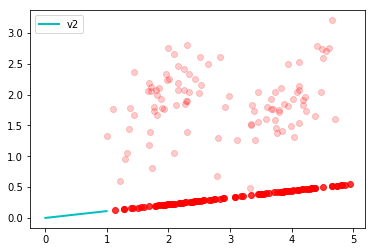

In [4]:
N = X.shape[1]
# m = np.sum(X, axis =1, keepdims=True)/N
m = np.mean(X, axis =1, keepdims=True)
# S = (X-m).dot((X-m).T)/(N-1)
S = np.cov(X - m)
val, vec = np.linalg.eig(S)
v_max = vec[:, np.argmax(val)].reshape((2,1))
y = v_max.T.dot(X)
X_new = np.linalg.pinv(v_max.T).dot(y)

print(np.max(val))
print(v_max)
print(y.shape, X_new.shape)

plt.figure()
plt.plot([0, v_max[0]], [0, v_max[1]], 'c-', lw=2, label="v2")

plt.plot(X[0, :], X[1, :], 'ro', alpha=0.2)
plt.plot(X_new[0, :], X_new[1, :], 'ro', alpha=0.8)
plt.axis('equal')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

## Sklearn

(2, 100) (100, 1)
[-0.99391792 -0.11012341]
[[0.99391792]
 [0.11012341]]


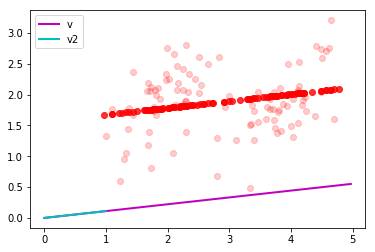

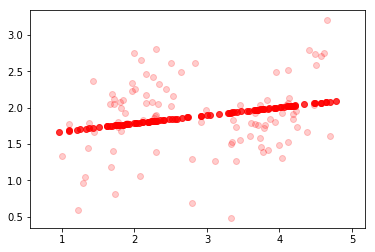

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_trans = pca.fit_transform(X.T)
X_new = pca.inverse_transform(X_trans)

print(X.shape, X_trans.shape)
# print(pca.explained_variance_)
# print(pca.components_)

plt.figure()
plt.plot(X[0, :], X[1, :], 'ro', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)

v = pca.components_[0]
v2 = v_max
print(v)
print(v2)
plt.plot([0, v[0]*-5], [0, v[1]*-5], 'm-', lw=2, label="v")
plt.plot([0, v2[0]], [0, v2[1]], 'c-', lw=2, label="v2")
plt.axis('equal')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.figure()
plt.plot(X[0, :], X[1, :], 'or', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.show()